# Catalog exploration example

In [16]:
import intake

from fresca_catalog.catalog import (
    search_catalog_variables,
    filter_catalog
)
from fresca_catalog.selector import (
    build_entries_selector,
    build_variables_selector,
    build_time_range_selector,
    build_bbox_selector
)
from fresca_catalog.plot import (
    plot_map,
    plot_grid, 
    plot_timeseries
)
from fresca_catalog.summary import (
    summarize_catalog,
    summarize_entry_stations,
    summarize_entry_variables
)

In [17]:
catalog = intake.open_catalog('full_catalog.yml')
catalog

Catalog
 named datasets: ['all_ctd', 'sfer']
  parameters: ['CATALOG_DIR', 'CATALOG_PATH', 'STORAGE_OPTIONS']

In [19]:
summarize_catalog(catalog)

,dataset,date_start,date_end,lon_min,lon_max,lat_min,lat_max,total_stations,total_casts,mean_station_casts,median_station_casts
0,all_ctd,2006-01-18,2023-03-08,-84.062667,-80.067667,23.6660,28.018667,475,3199,6.9,3.0
1,sfer,2014-12-01,2024-11-17,-85.022100,-80.044200,24.3952,28.784100,216,5814,28.0,28.5


In [3]:
# entries_selector = build_entries_selector(catalog)

In [4]:
help(search_catalog_variables)

Help on function search_catalog_variables in module fresca_catalog.catalog:

search_catalog_variables(catalog, query=None, case_insensitive=True, fuzzy=False) -> List[str]
    Searches the catalog for variables.
    
    Parameters
    ----------
    catalog : Catalog
        The catalog to search.
    query : str or list, optional
        The query or list of queries to search for. If None, returns all variables. Default is None.
    case_insensitive : bool, optional
        Whether to perform a case-insensitive search. Default is True.
    fuzzy : bool, optional
        Whether to perform a fuzzy search. Default is False.
    
    Returns
    -------
    list
        A list of matching variables.



In [5]:
search_catalog_variables(catalog, 'sal')

['sal', 'salinity']

In [6]:
search_catalog_variables(catalog, ['o2', 'oxy'])

['dissolved_oxygen', 'no2', 'no3_no2', 'o2_ctd', 'oxygen_saturation']

In [ ]:
variables_selector = build_variables_selector(catalog)

In [ ]:
time_range_selector = build_time_range_selector(catalog)

In [9]:
bbox_selector = build_bbox_selector(catalog)

BokehModel(combine_events=True, render_bundle={'docs_json': {'43e200db-9bcd-47aa-849d-7e04cc10071b': {'version…

In [13]:
help(filter_catalog)

Help on function filter_catalog in module fresca_catalog:

filter_catalog(catalog: intake.readers.entry.Catalog, entry_names: List[str] = None, variables: List[str] = None, time_range: Tuple[str, str] = None, bbox: Tuple[float, float, float, float] = None) -> intake.readers.entry.Catalog
    Filters a catalog based on the provided criteria.
    
    Parameters
    ----------
    catalog : Catalog
        The catalog to filter.
    entries : list, optional
        The entries to be used for filtering.
    variables : list, optional
        The variables to be used for filtering.
    time_range : list, optional
        The time range to be used for filtering, formatted as [min_time, max_time].
    bbox : list, optional
        The bounding box to be used for filtering, formatted as [min_lon, min_lat, max_lon, max_lat].
    
    Returns
    -------
    Catalog
        The filtered catalog.



In [10]:
filtered_catalog = filter_catalog(
    catalog,
    # entries=entries_selector.result,
    variables=variables_selector.result,
    time_range=time_range_selector.result,
    bbox=bbox_selector.result
)
filtered_catalog

Catalog
 named datasets: ['all_ctd']

In [20]:
summarize_entry_stations(catalog, 'all_ctd')

,station,date_start,date_end,lon,lat,total_casts,max_depths,median_depths
0,58,2006-01-18,2021-06-05,-81.653875,25.166403,48,35,19
1,59,2006-01-18,2018-10-19,-81.498136,25.166614,22,22,12
2,60,2006-01-18,2022-10-14,-81.335901,25.166635,52,10,7
3,61,2006-01-18,2017-10-11,-81.274400,25.166867,5,7,7
4,62,2006-01-18,2018-08-09,-81.234971,25.166490,17,5,3
...,...,...,...,...,...,...,...,...
470,.CW5,2023-03-07,2023-03-07,-83.239167,28.010500,1,37,37
471,.CW6,2023-03-07,2023-03-07,-83.403500,28.010500,1,50,50
472,.CW7,2023-03-07,2023-03-07,-83.567833,28.011833,1,61,61
473,.ROME4,2023-03-07,2023-03-07,-82.921167,27.649667,1,16,16


In [21]:
summarize_entry_variables(catalog, 'all_ctd')

,variable,date_start,date_end,lon_min,lon_max,lat_min,lat_max,total_stations,total_casts,mean_station_casts,median_station_casts
0,scan,2006-01-18,2023-03-08,-84.062667,-80.067667,23.6660,28.018667,475,3199,6.9,3.0
1,salinity,2006-01-18,2023-03-08,-84.062667,-80.067667,23.6660,28.018667,475,3196,6.9,3.0
2,temperature,2006-01-18,2023-03-08,-84.062667,-80.067667,23.6660,28.018667,475,3199,6.9,3.0
3,pressure,2006-01-18,2023-03-08,-84.062667,-80.067667,23.6660,28.018667,475,3199,6.9,3.0
4,sea_water_electrical_conductivity,2006-01-18,2023-03-08,-84.062667,-80.067667,23.6660,28.018667,475,3196,6.9,3.0
5,CDOM,2018-03-08,2023-03-08,-83.567833,-80.081833,24.4745,28.017167,299,697,2.4,2.0
6,dissolved_oxygen,2006-01-18,2023-03-08,-84.062667,-80.067667,23.6660,28.018667,473,3151,6.8,3.0
7,oxygen_saturation,2006-01-18,2023-03-08,-84.062667,-80.067667,23.6660,28.018667,473,3151,6.8,3.0
8,chlorophyll_concentration,2018-03-08,2023-03-08,-83.567833,-80.081833,24.4745,28.017167,286,627,2.3,1.0
9,chlorophyll_fluorescence,2006-01-18,2023-03-08,-84.062667,-80.067667,23.6660,28.018667,412,3078,7.6,3.0


In [11]:
plot_map(filtered_catalog, time_bin='ME', log=True)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (mean,station)

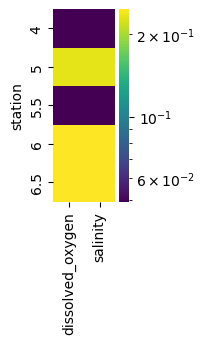

In [12]:
plot_grid(filtered_catalog, stations=['4', '5', '5.5', '6', '6.5'], time_bin='ME', log=True)

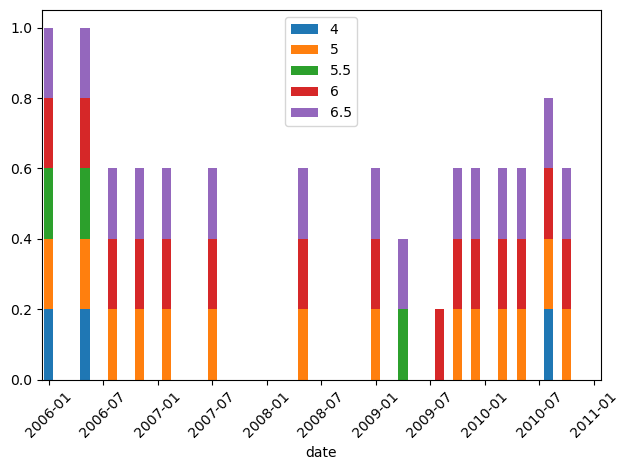

In [13]:
plot_timeseries(filtered_catalog, stations=['4', '5', '5.5', '6', '6.5'], time_bin='ME')

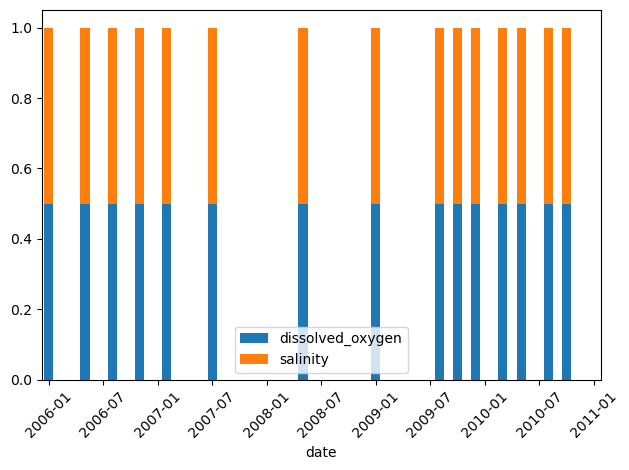

In [14]:
plot_timeseries(filtered_catalog, stations='6', time_bin='ME')

In [24]:
my_catalog.to_yaml_file('my_catalog.yaml')